In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

2025-06-10 22:35:45.611382: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 22:35:45.612741: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 22:35:45.616156: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 22:35:45.624890: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749594945.639522   54248 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749594945.64

In [4]:
keras.__version__


'3.10.0'

In [5]:
tf.keras.__version__


'3.10.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

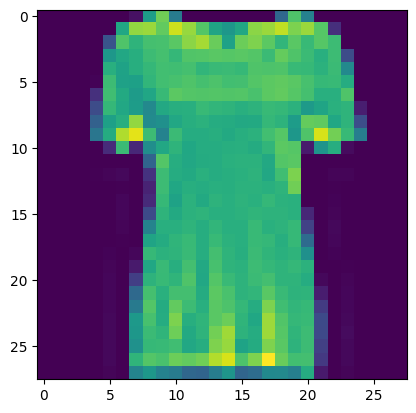

In [7]:
plt.imshow(X_train_full[10])

In [8]:
y_train_full[10]

np.uint8(0)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[10]]

'T-shirt/top'

In [11]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [12]:
X_train_n = X_train_full / 255.
X_test_n =  X_test / 255.

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test =  X_test_n

In [14]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])


2025-06-10 22:35:47.701663: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

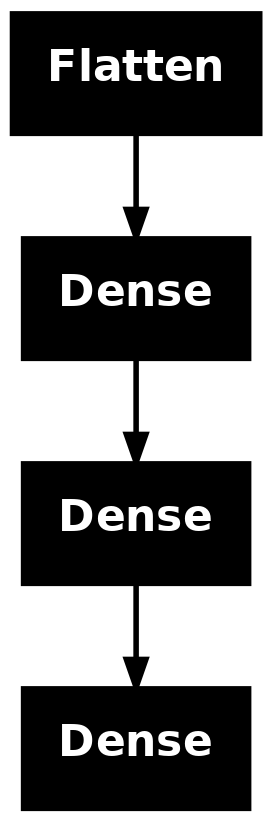

In [18]:
import pydot
keras.utils.plot_model(model)

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[-0.04361641, -0.00673996,  0.04829532, ...,  0.07292061,
         0.01249363, -0.07086528],
       [-0.03833081, -0.0165379 , -0.02203576, ..., -0.0198715 ,
        -0.00772359, -0.00383776],
       [-0.06882291, -0.05796321,  0.05155805, ...,  0.00721471,
        -0.02848004, -0.044739  ],
       ...,
       [ 0.07174288, -0.04426153, -0.0053416 , ..., -0.05847826,
        -0.05508368,  0.00458203],
       [-0.01643857, -0.02974558, -0.026728  , ...,  0.02461879,
        -0.06718439, -0.00261667],
       [-0.0176227 , -0.04277368,  0.06273806, ...,  0.03957335,
         0.01518917, -0.01408714]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [25]:
model_history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6720 - loss: 1.0036 - val_accuracy: 0.8214 - val_loss: 0.5263
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.5039 - val_accuracy: 0.8442 - val_loss: 0.4601
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8411 - loss: 0.4500 - val_accuracy: 0.8508 - val_loss: 0.4254
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8522 - loss: 0.4198 - val_accuracy: 0.8606 - val_loss: 0.4034
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.3980 - val_accuracy: 0.8660 - val_loss: 0.3870
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.3807 - val_accuracy: 0.8690 - val_loss: 0.3738
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.3667 - val_accuracy: 0.8690 - val_loss: 0.3639
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8733 - loss: 0.3545 - 

In [26]:
model_history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [27]:
model_history.history

{'accuracy': [0.7595818042755127,
  0.8293091058731079,
  0.8437818288803101,
  0.8537999987602234,
  0.8601090908050537,
  0.8659090995788574,
  0.8702181577682495,
  0.8744000196456909,
  0.8781999945640564,
  0.8809818029403687,
  0.8836727142333984,
  0.8861272931098938,
  0.8885090947151184,
  0.8907272815704346,
  0.8928181529045105,
  0.8954181671142578,
  0.8976545333862305,
  0.8998908996582031,
  0.9019818305969238,
  0.9040545225143433,
  0.906000018119812,
  0.908054530620575,
  0.9095090627670288,
  0.910945475101471,
  0.9128545522689819,
  0.9140363931655884,
  0.9153454303741455,
  0.9169999957084656,
  0.9185636639595032,
  0.9201818108558655],
 'loss': [0.7254594564437866,
  0.49006128311157227,
  0.4444206655025482,
  0.416675329208374,
  0.39619180560112,
  0.3796696662902832,
  0.3660075068473816,
  0.35404127836227417,
  0.34349820017814636,
  0.33406007289886475,
  0.3254133462905884,
  0.31746146082878113,
  0.3101215064525604,
  0.3033238351345062,
  0.29677993

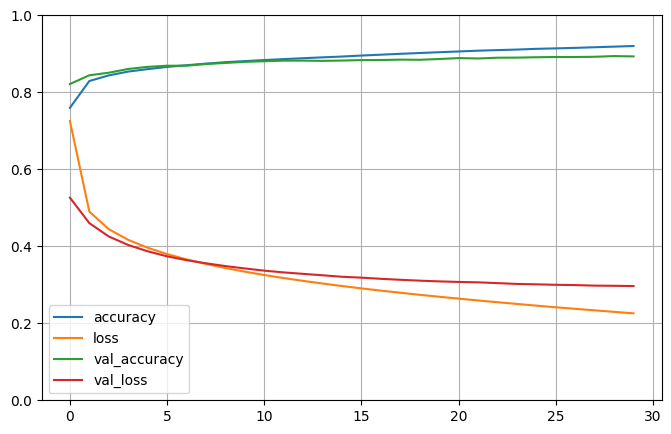

In [28]:
import pandas as pd
  # <== À ajouter si pas encore importé

# Convertir l'historique en DataFrame et tracer les courbes
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # Met la limite de l’axe y entre 0 et 1
plt.show()



In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.3332


[0.32940059900283813, 0.8840000033378601]

In [30]:
X_new = X_test[:3]

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
# Prédire les probabilités
y_proba = model.predict(X_new)

# Choisir la classe ayant la probabilité la plus élevée
y_pred = np.argmax(y_proba, axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(shape=(28, 28))


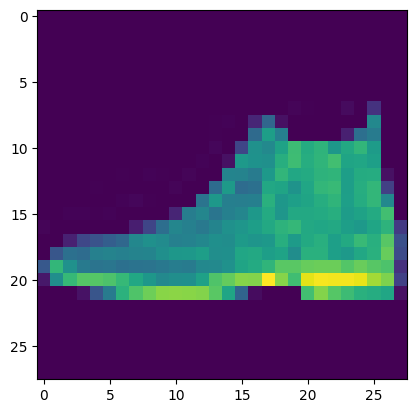

In [34]:
print(plt.imshow(X_test[0]))

AxesImage(shape=(28, 28))


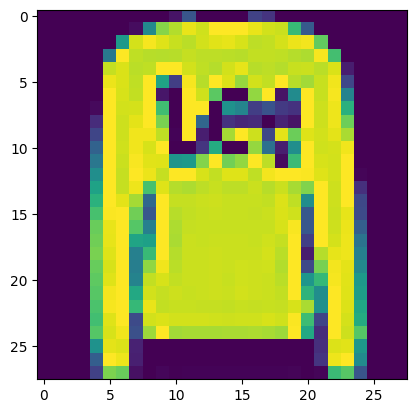

In [35]:
print(plt.imshow(X_test[1]))

AxesImage(shape=(28, 28))


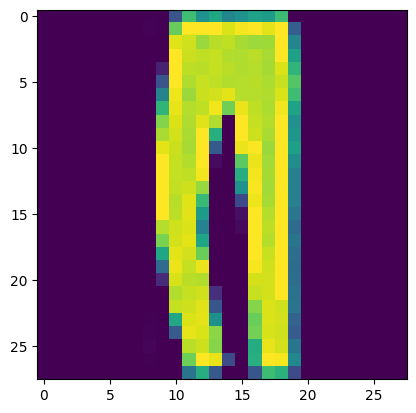

In [36]:
print(plt.imshow(X_test[2]))

In [37]:
model.save("my_Func_model.keras")

In [38]:
%pwd

'/workspaces/mlops-zoom'

In [52]:
del model


In [40]:
keras.backend.clear_session()

In [122]:
model = keras.models.load_model("my_Func_model.keras")

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [49]:
y_pred = model.predict(X_new)
print (y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[1.6256075e-05 3.2293460e-06 2.7776981e-05 1.5121554e-05 6.3384859e-06
  1.5743172e-02 1.7806002e-06 2.3771232e-02 9.4366650e-04 9.5947146e-01]
 [1.9314950e-05 5.7858701e-10 9.9767882e-01 1.4214148e-09 2.1407038e-03
  2.2665864e-11 1.6118443e-04 5.6758175e-12 1.4575510e-08 9.3294990e-13]
 [9.2356338e-08 9.9999928e-01 1.1299123e-08 8.0052097e-08 4.8216395e-07
  6.5283130e-13 2.1625537e-10 3.6777998e-14 7.1476179e-11 2.7309281e-12]]


In [53]:
keras.backend.clear_session()
np.random.seed (42)
tf.random.set_seed(42)

In [69]:
X_train_flat = X_train.reshape(-1, 28*28)  # devient (60000, 784)

In [83]:
X_train_flat = X_train.reshape(-1, 28 * 28)
X_valid_flat = X_valid.reshape(-1, 28 * 28)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(784,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [84]:
model.compile(
    loss="mse",  # Mean Squared Error
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # Descente de gradient
    metrics=["mae"]  # Mean Absolute Error, utile pour suivre la performance
)


In [85]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-(epoch:02d).keras")

In [86]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,511 (95.75 KB)

 Trainable params: 24,511 (95.75 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
print("X_train_flat.shape:", X_train.shape)
print("y_train_full.shape:", y_train.shape)


X_train_flat.shape: (55000, 28, 28)
y_train_full.shape: (55000,)


In [87]:
history = model.fit(
    X_train_flat, y_train,
    epochs=10,
    validation_data=(X_valid_flat, y_valid),
    callbacks=[checkpoint_cb]
)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.7064 - mae: 1.5571 - val_loss: 2.0208 - val_mae: 1.0341
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9895 - mae: 1.0289 - val_loss: 1.8528 - val_mae: 0.9705
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8171 - mae: 0.9634 - val_loss: 1.7589 - val_mae: 0.9303
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7210 - mae: 0.9250 - val_loss: 1.6981 - val_mae: 0.9054
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6529 - mae: 0.8974 - val_loss: 1.6574 - val_mae: 0.8884
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6008 - mae: 0.8770 - val_loss: 1.6245 - val_mae: 0.8761
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5582 - mae: 0.8598 - val_loss: 1.5939 - val_mae: 0.8655
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5221 - mae: 0.8451 - val_loss: 1.5734 - val_mae: 0.8588
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━

In [95]:
del model
keras.backend.clear_session()

In [100]:
model = keras.models.load_model("my_Func_model.keras")

In [101]:
mse_test = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.3332


In [115]:
del model
keras.backend.clear_session()

In [103]:
X_train_flat = X_train.reshape(-1, 28 * 28)
X_valid_flat = X_valid.reshape(-1, 28 * 28)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(784,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [104]:
model.compile(
    loss="mse",  # Mean Squared Error
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),  # Descente de gradient
    metrics=["mae"]  # Mean Absolute Error, utile pour suivre la performance
)


In [109]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.keras", save_best_only=True)

In [110]:
history = model.fit(
    X_train_flat, y_train,
    epochs=10,
    validation_data=(X_valid_flat, y_valid),
    callbacks=[checkpoint_cb]
)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3.7977 - mae: 1.4392 - val_loss: 1.9746 - val_mae: 1.0012
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.9691 - mae: 1.0149 - val_loss: 1.7944 - val_mae: 0.9413
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7796 - mae: 0.9449 - val_loss: 1.7074 - val_mae: 0.9110
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6764 - mae: 0.9059 - val_loss: 1.6557 - val_mae: 0.8914
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.6076 - mae: 0.8789 - val_loss: 1.6105 - val_mae: 0.8742
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.5561 - mae: 0.8596 - val_loss: 1.5798 - val_mae: 0.8635
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5148 - mae: 0.8436 - val_loss: 1.5366 - val_mae: 0.8454
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4797 - mae: 0.8298 - val_loss: 1.5104 - val_mae: 0.8336
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━

In [121]:
model = keras.models.load_model("Best_Model.keras") # rollback to best model


In [123]:
msetest  = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.3332


In [139]:
del model
keras.backend.clear_session()

In [140]:
X_train_flat = X_train.reshape(-1, 28 * 28)
X_valid_flat = X_valid.reshape(-1, 28 * 28)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(784,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [141]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [142]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.keras", save_best_only=True)

In [143]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#patience: Number of epochs with no improvement after which training will be stopped.

In [144]:
history = model.fit(
    X_train_flat, y_train,
    epochs=200,
    validation_data=(X_valid_flat, y_valid),
        callbacks=[checkpoint_cb, early_stopping_cb])



Epoch 1/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.2170 - val_loss: 2.0351
Epoch 2/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9980 - val_loss: 1.8770
Epoch 3/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.8326 - val_loss: 1.8027
Epoch 4/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7283 - val_loss: 1.7253
Epoch 5/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6481 - val_loss: 1.6423
Epoch 6/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5862 - val_loss: 1.6001
Epoch 7/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.5385 - val_loss: 1.5675
Epoch 8/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4982 - val_loss: 1.5434
Epoch 9/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4661 - val_loss: 1.5202
Epoch 10/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4369 - val_loss: 1.5047
Epoch 11/200
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4107 - val_loss: 1.4832
Epoch 12/200
1719/1

In [145]:
model = keras.models.load_model("early_stop_model.keras") # rollback to best model


In [151]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [152]:
X_test_flat = X_test.reshape(-1, 28 * 28)

In [154]:
 
mse_test  = model.evaluate(X_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2729
